**Import All Needed Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Get and Read, Analyse data**

In [21]:
customer_data=pd.read_csv('/content/insurance.csv')
customer_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
customer_data.shape

(1338, 7)

Catagorcal Features:
1. Sex
2. Smokers
3. Region

In [23]:
customer_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Statistical Info**

In [24]:
customer_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Age vs Insurance Cost**

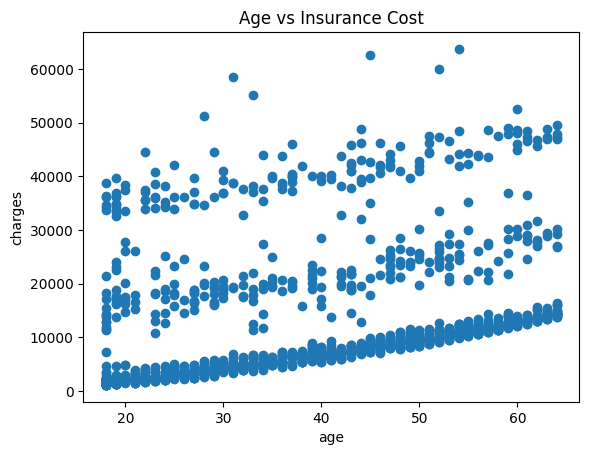

In [25]:
plt.scatter(data=customer_data,x='age', y='charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Insurance Cost')
plt.show()

**BMI vs Insuranse Cost**

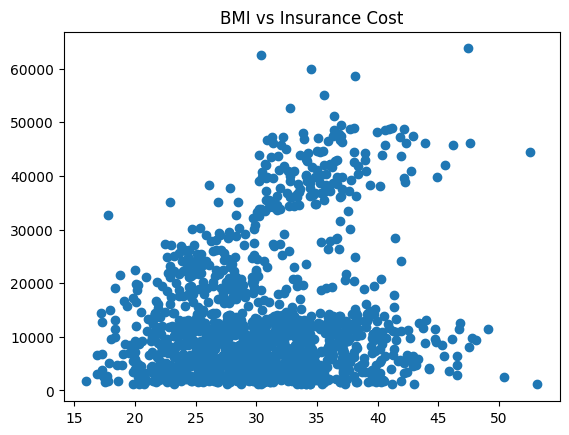

In [12]:
plt.scatter(data=customer_data,x='bmi',y='charges')
plt.title('BMI vs Insurance Cost')
plt.show()


**Smoker vs Charges**


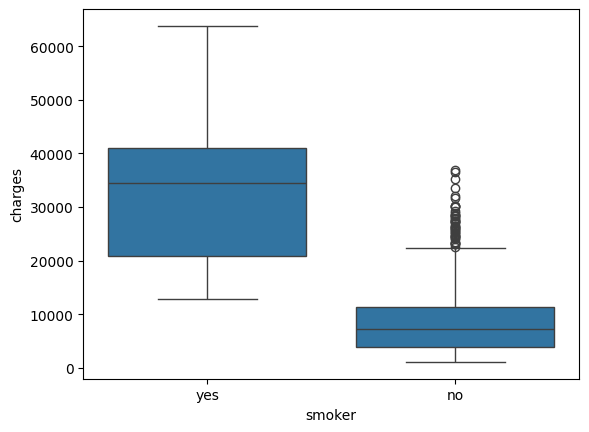

In [26]:
sns.boxplot(data=customer_data, x='smoker',y='charges')
plt.show()

**Gender vs Charges**


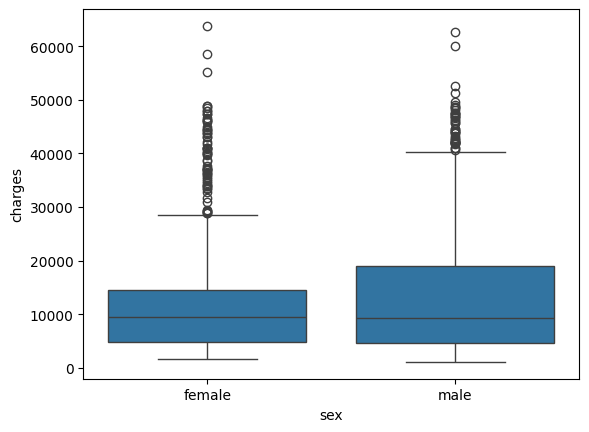

In [16]:
sns.boxplot(data=customer_data, x='sex',y='charges')
plt.show()

**Region vs Charges**


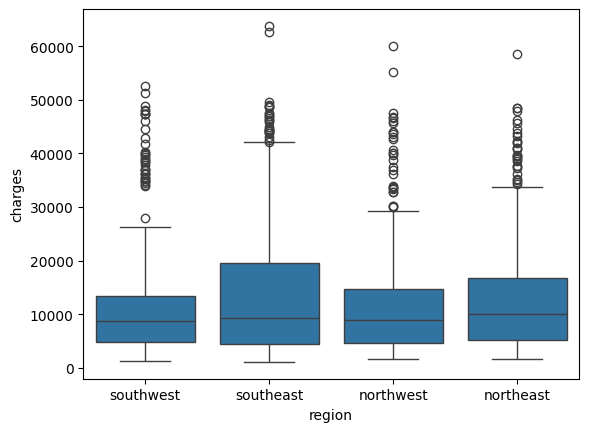

In [29]:
sns.boxplot(data=customer_data, x='region',y='charges')
plt.show()

**Correlation Analysis**

In [40]:
customer_data_encoded = pd.get_dummies(customer_data)
customer_data_encoded.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


Correlation does not work for string, so encod it into binary or true, false

In [41]:
customer_data_encoded


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


**Split, Train, and Test the Data**

In [59]:
#Separate input x and output y
x=customer_data_encoded.drop('charges', axis=1)
y=customer_data_encoded['charges']


In [61]:
#Split the Data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
#coefficient
model.coef_

array([   251.22566407,    332.82271398,    587.9253102 ,     18.56120037,
          -18.56120037, -11956.17261513,  11956.17261513,    527.72812674,
          148.53816329,   -256.75623287,   -419.51005716])

In [80]:
#intercept
model.intercept_

np.float64(-349.37038695017327)

In [81]:
model.intercept_+model.coef_

array([   -98.14472288,    -16.54767297,    238.55492325,   -330.80918658,
         -367.93158732, -12305.54300208,  11606.80222818,    178.35773979,
         -200.83222366,   -606.12661982,   -768.88044411])

In [82]:
#predicted y
y_pred=model.predict(x_test)

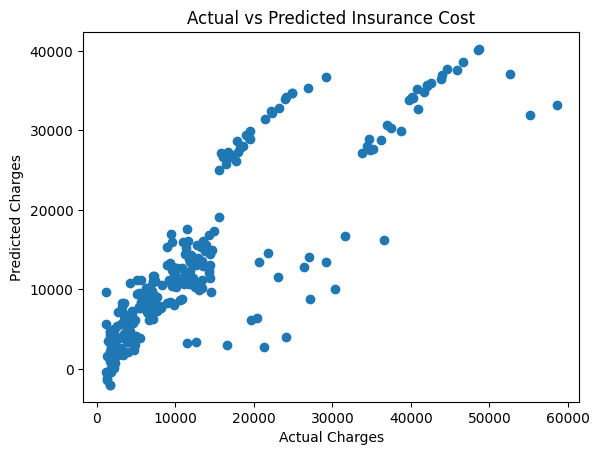

In [83]:
#PLOT
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Cost")
plt.show()


**Predict for new Customer**

In [98]:
feature_names = x_train.columns


In [100]:
new_customer = {
    'age': 40,
    'bmi': 30,
    'children': 2,
    'sex_male': 1,            # male=1, female=0
    'smoker_yes': 1,          # smoker yes=1, no=0
    'region_northwest': 0,
    'region_southeast': 1,
    'region_southwest': 0
}
new_customer

{'age': 40,
 'bmi': 30,
 'children': 2,
 'sex_male': 1,
 'smoker_yes': 1,
 'region_northwest': 0,
 'region_southeast': 1,
 'region_southwest': 0}

In [105]:
new_customer_df = pd.DataFrame([new_customer])
new_customer_df = new_customer_df.reindex(columns=feature_names, fill_value=0)
new_customer_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,40,30,2,0,1,0,1,0,0,1,0


In [106]:
predicted_cost = model.predict(new_customer_df)
print("Predicted Insurance Cost:", predicted_cost[0])


Predicted Insurance Cost: 32541.043397467187
